# 1.Data assessment

The first step in data understanding is a Data Assessment. This should be undertaken before the kick-off of a project as it is an important step to validate its feasibility. This task evaluates what data is available and how it aligns to the business problem.

# Collecting data

If you wish to make predictions using machine learning, you most likely require a labeled data set. For each of your examples, you need the correct value, or appropriate category, that the machine learning model should learn to predict; this is called the Ground Truth. This may already be available to you as it’s an action or event (e.g. a value indicating whether or not the customer churned) or it might be something you need to collect (e.g. the topic of an email).

If the ground truth needs to be collected, or manually labeled, a plan should be made to understand how this would be achieved and the time and effort it will take to complete. This should be carefully considered as the this could be too time-consuming, and consequently costly, making the project unfeasible.

# Data relevance

Write down all the different data points that will be made available and evaluate if it intuitively makes sense that a machine learning model could predict with this data. Is there proven evidence that there is a connection between these data points and what you wish to achieve? If you add unrelated features to a machine learning model, you’re adding noise, making the algorithm look for connections that aren’t there. This can result in decreased performance.

Conversely, if a human is undertaking this task today, explore what they use to make the decision. Is that data available to be used in the model? When building a model, it is good to start simple — use only the obvious features first and see how this performs before adding those you’re less sure about. This allows you to evaluate if the additional features add value.

# Quantity of Data

To successfully build a machine learning model, you must be sufficient data. There is no strict formula to calculate how much should be use as it is dependent on the complexity of the problem and algorithms you are using.

try to ensure you have lots of variation in your features too. For example, if you are predicting house prices and one of your inputs is neighborhood, you want to make sure you have good coverage of all neighborhoods so the model can learn how this impacts the price.

# Ethics

It is important at the beginning of a project to consider potential harms from your tool. These harms can be caused by designing for only a narrow group of users, having insufficient representation of sub-populations, or human labelers favoring a privileged group.

Machine learning discovers and generalizes patterns in the data and could, therefore, replicate bias. If a group is under-represented, the machine learning model has fewer examples to learn from, resulting in reduced accuracy for those individuals in this group.

When implementing these models at scale, it can result in a large number of biased decisions, harming a large number of people. Ensure you have evaluated risks and have techniques in place to mitigate them.

# Data Exploration

Once you have access to data, you can start Data Exploration. This is a phase for creating meaningful summaries of your data and is particularly important if you are unfamiliar with the data. This is also the time you should test your assumptions. The types of activities and possible questions to ask are:

Count the number of records — is this what you expected?

What are the datatypes? Will you need to change these for a machine learning model?

Look for missing values — how should you deal with these?

Verify the distribution of each column — are they matching the distribution you expect (e.g. normally distributed)?

Search for outliers — are there anomalies in your data? Are all values valid (e.g. no ages less than 0)?

Validated if your data is balanced — are different groups represented in your data? Are there enough examples of each class you wish to predict?

Is there bias in your data — are subgroups in your data treated more favorable than others?

# Key consideration

# 1.Missing Values

An ideal dataset would be complete, with valid values for every observation. However, in reality, you will come across many “NULL” or “NaN” values.

The simplest way to deal with missing data is to remove all rows that have a missing value but valuable information can be lost or you could introduce bias. Consequently, it is important to try to understand if there is a reason or pattern for the missing values. For example, particular groups of people may not respond to certain questions in a survey; removing them will prevent learning trends within these groups.


An alternative to removing data is imputing values; replacing missing values with an appropriate substitute. For continuous variables, the mean, median, or mode are often used. Whilst, for categorical data it is frequently the mode or a new category (e.g. “NA”). If columns have a high proportion of values missing, you may wish to remove them entirely.

# 2. Outliers

An outlier is a data point that is significantly different from other observations. Once you identify outliers, you should also investigate what may have caused them.

Outliers could indicate bad data: data that was incorrectly collected. If this is the case, you may wish to remove these data points or replace them (similar to how you impute values for missing data). Alternatively, these values could be interesting and useful for your machine learning model.

Some machine learning algorithms, such as linear regression, can be sensitive to outliers. Consequently, you may wish to only use algorithms more robust to outliers, such as random forest or gradient boosted trees.









# 3.Un-balanced Data

A dataset is unbalanced if each class does not have a similar number of examples. This is common with classification problems such as fraud detection; the majority of transactions are normal, whilst a small proportion are fraudulent.

Machine learning algorithms learn from examples; the more examples it has, the more confident it can be in the patterns it has discovered. If your data is unbalanced, the model may not be able to identify what patterns are associated with the minority categories.

Care must be taken with the performance metric you use when working with unbalanced data. For example, accuracy can be misleading in our fraud example: if 99.9% of transactions are not-fraud, a model can be 99.9% accurate by simply labeling all transactions as “non-fraud” with no need to search for further patterns. You may wish to consider other metrics such as precision, recall or F1-score.

Features may also be unbalanced, preventing the algorithm from learning how these categories impact the output. For example, you have a dataset containing mostly one sub-population, when customers outside of this group use your product are not getting successful results. To prevent this form of bias, you should calculate your accuracy metrics for different categories.

Next Steps
After you’ve gained a thorough understanding of your data, hopefully you are ready to move to the next step Data Preparation: Cleansing, Transformation & Feature Engineering.


In [179]:
import pandas as pd

In [180]:
import numpy as np

In [181]:
import random as rnd
import seaborn as sns

In [182]:
# visualization
import matplotlib.pyplot as plt


# Acquire data
The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [183]:
tested_df = pd.read_csv('tested.csv')
tested_df

# Location = r'C:\Users\bakhshi\Desktop\Matplotlib\tested.csv'
# df = pd.read_csv(Location)
# df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [184]:
# Store our test passenger IDs for easy access
PassengerId = tested_df['PassengerId']
PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [185]:
# Showing starting overview of the train dataset
tested_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [186]:
# Fetching columns
print(tested_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [187]:
#See last 5 data of the given file
tested_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Which features contain blank, null or empty values?

These will require correcting.

Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
Cabin > Age are incomplete in case of test dataset.
What are the data types for various features?

In [188]:
tested_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [189]:
# Copy original dataset in case we need it later when digging into interesting features

In [190]:
original_test = tested_df.copy() # Using 'copy()' allows to clone the dataset, creating a different object with the same values
original_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [191]:
# Feature that tells whether a passenger had a cabin on the Titanic

tested_df['Has_Cabin'] = tested_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
tested_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [192]:
tested_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,417
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,269


# Checking Missing Values

In [193]:
tested_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         1
Has_Cabin        0
dtype: int64

# Creating a new feature 'Title' by extracting title from names

In [194]:
for dataset in tested_df:
    tested_df['Title'] = tested_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(tested_df['Title'], tested_df['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


# Replacing Titles with common ones or Rare and coverting them to ordinal values

In [195]:
for dataset in tested_df:
    tested_df['Title'] = tested_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    tested_df['Title'] = tested_df['Title'].replace('Mlle', 'Miss')
    tested_df['Title'] = tested_df['Title'].replace('Ms', 'Miss')
    tested_df['Title'] = tested_df['Title'].replace('Mme', 'Mrs')

In [196]:
# title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in tested_df:
    tested_df['Title'] = tested_df['Title'].map(title_mapping)
    tested_df['Title'] = tested_df['Title'].fillna(0)


tested_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.0


# Handling missing values for Age and Embarked

In [197]:
#filling missing values for 'Embarked' with most frequent one
freq_port = tested_df.Embarked.dropna().mode()[0]
for dataset in tested_df:
    tested_df['Embarked'] = tested_df['Embarked'].fillna(freq_port)
    
tested_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
1,Q,0.521739
0,C,0.392157
2,S,0.325926


# Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

Correlating.

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

Completing.

We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.
Correcting.

Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.
Creating.

We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
We may want to engineer the Name feature to extract Title as a new feature.
We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
We may also want to create a Fare range feature if it helps our analysis.
Classifying.

We may also add to our assumptions based on the problem description noted earlier.

Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived.
The upper-class passengers (Pclass=1) were more likely to have survived.


In [198]:
# shape of the tested_df
tested_df.shape 

(418, 14)

In [199]:
# count the number of male and female
tested_df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [200]:
# look at numeric and categorical values separately 
# df_num = tested_df[['Age','SibSp','Parch','Fare']]
# df_cat = tested_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
# df_num

In [201]:
# df_cat

# Analyze by pivoting features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [202]:
tested_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.467290
2,3,0.330275
1,2,0.322581


In [203]:
tested_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,1.0
1,male,0.0


In [204]:
tested_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
5,5,1.000000
6,8,0.500000
1,1,0.490909
2,2,0.428571
0,0,0.310954
3,3,0.250000
4,4,0.250000


In [205]:
tested_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
4,4,1.000000
3,3,0.666667
2,2,0.606061
1,1,0.538462
7,9,0.500000
0,0,0.305556
5,5,0.000000
6,6,0.000000


In [206]:
tested_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,Title
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.0
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188,0.217703,0.0
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576,0.413179,0.0
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.0
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.0
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000,0.0
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000,0.000000,0.0
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,0.0


# Detecting the outliers

Outliers can be detected using visualization, implementing mathematical formulas on the dataset, or using the statistical approach. All of these are discussed below. 

1. Visualization

# Using box plot

<AxesSubplot:>

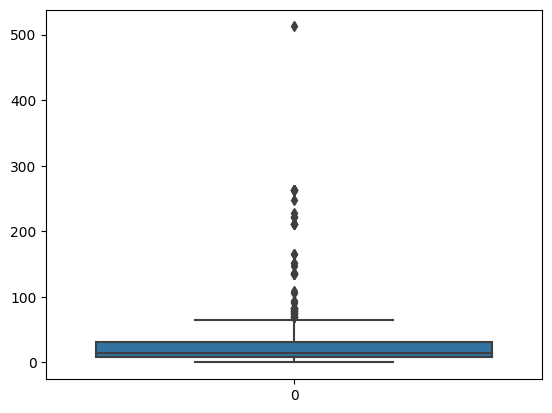

In [207]:
sns.boxplot(tested_df['Fare'])

<AxesSubplot:>

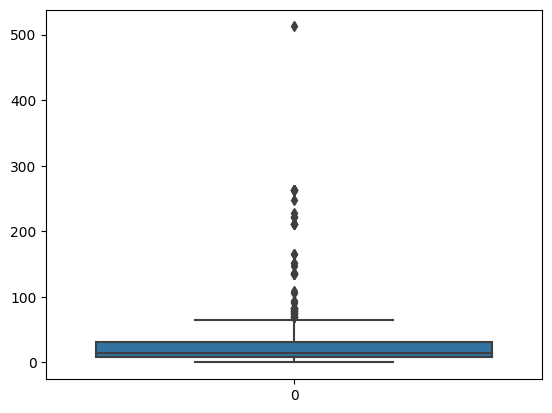

In [208]:
sns.boxplot(tested_df['Fare'])

<AxesSubplot:>

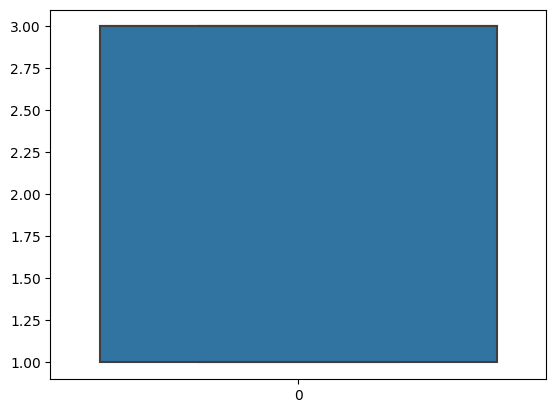

In [209]:
sns.boxplot(tested_df['Pclass'])

C:\Users\bakhshi\AppData\Local\Temp\ipykernel_15304\2220532885.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tested_df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 5),stacked=True)


<AxesSubplot:xlabel='Sex'>

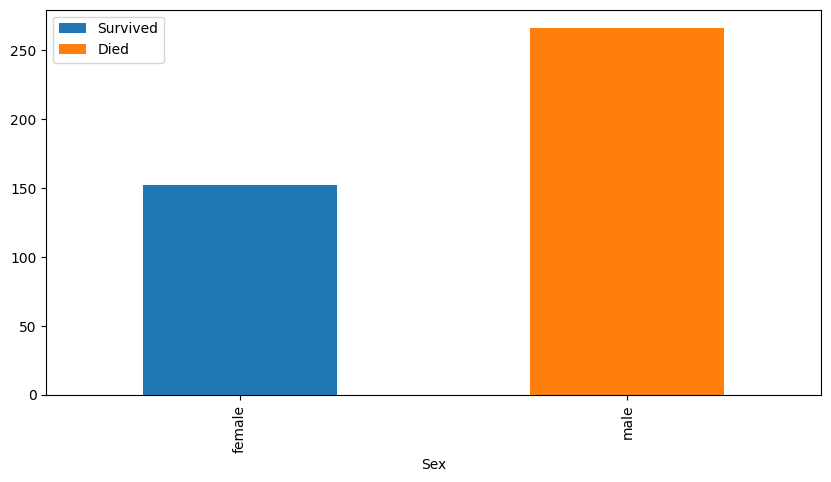

In [210]:
#Visualizing survivals based on gender
tested_df['Died'] = 1 - tested_df['Survived']
tested_df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 5),stacked=True)

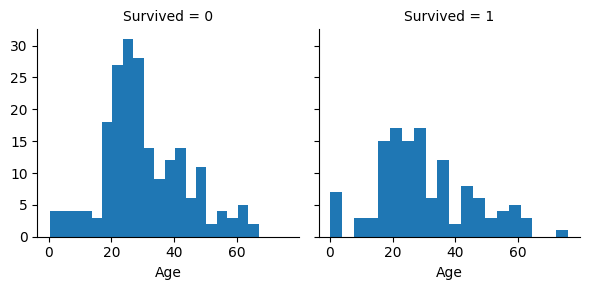

In [211]:
g = sns.FacetGrid(tested_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

# Data Cleaning

The data cleaning process detects and removes the errors and inconsistencies present in the data and improves its quality. Data quality problems occur due to misspellings during data entry, missing values or any other invalid data. Basically, “dirty” data is transformed into clean data. “Dirty” data does not produce the accurate and good results. Garbage data gives garbage out. So it becomes very important to handle this data. Professionals spend a lot of their time on this step.

# Reasons for “dirty” or “unclean” data

Dummy values

Absence of data

Violation of business rules

Data integration problems

Contradicting data

Inappropriate use of address line

Reused primary keys

Non-unique identifiers

# What to do to clean data?

Handle Missing Values

Handle Noise and Outliers

Remove Unwanted data

We drop all columns from the training dataset, which we substituted with better ones. We drop auxiliary columns. We also drop the Cabin column, because of its numerous missing values

In [212]:
dataset = tested_df.drop(['Age','Ticket','Cabin'],axis = 1)
# test = dataset.drop(['Name','Age''Sex'],axis = 1)
# test
dataset

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Has_Cabin,Title,Died
0,892,0,3,"Kelly, Mr. James",male,0,0,7.8292,Q,0,0.0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,7.0000,S,0,0.0,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,9.6875,Q,0,0.0,1
3,895,0,3,"Wirz, Mr. Albert",male,0,0,8.6625,S,0,0.0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,12.2875,S,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,0,0,8.0500,S,0,0.0,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,0,0,108.9000,C,1,0.0,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,0,0,7.2500,S,0,0.0,1
416,1308,0,3,"Ware, Mr. Frederick",male,0,0,8.0500,S,0,0.0,1


# Noisy Data

Noise is unwanted data items, features or records which don’t help in explaining the feature itself, or the relationship between feature & target. Noise often causes the algorithms to miss out patterns in the data. Noisy data is meaningless data. The term has been used as a synonym for corrupt data. However, its meaning include any data that cannot be understood and interpreted correctly by machines, such as unstructured text. Any data which has been received, stored, or changed in such a manner that it cannot be read or used by the program can be described as noisy data.

In [110]:
data = tested_df.drop(3)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Died,Title
0,0,3,male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0.0
1,1,3,female,47.0,1,0,363272,7.0000,NaN,S,0,0,0.0
2,0,2,male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0.0
4,1,3,female,22.0,1,1,3101298,12.2875,NaN,S,0,0,0.0
5,0,3,male,14.0,0,0,7538,9.2250,NaN,S,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1,0.0
414,1,1,female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0.0
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,0.0
416,0,3,male,NaN,0,0,359309,8.0500,NaN,S,0,1,0.0


In [117]:
tested_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [119]:
tested_df.drop_duplicates()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Died,Title
0,0,3,male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0.0
1,1,3,female,47.0,1,0,363272,7.0000,NaN,S,0,0,0.0
2,0,2,male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0.0
3,0,3,male,27.0,0,0,315154,8.6625,NaN,S,0,1,0.0
4,1,3,female,22.0,1,1,3101298,12.2875,NaN,S,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1,0.0
414,1,1,female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0.0
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,0.0
416,0,3,male,NaN,0,0,359309,8.0500,NaN,S,0,1,0.0


In [122]:
#Since there exist 2 null values in the Embarked column, let's drop those rows containing null values
tested_df.dropna(inplace=True)

In [124]:
tested_df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Cabin        0
Embarked     0
Has_Cabin    0
Died         0
Title        0
dtype: int64

# Normalization

Beginners to data science or machine learning often have questions about data normalization, why it’s needed, and how it works. Put simply, data normalization is a data preparation technique that is common in machine learning. Its goal is to transform features to similar scales (change the range of the values) to help improve the performance and training stability of a model.
Note that not every dataset needs to be normalized for machine learning; it’s only needed when the ranges of attributes are different.

# Normalization techniques in machine learning
The most widely used types of normalization techniques in machine learning are:

Min-max

Z-score

Log scaling

In order to implement the above techniques, the following functions are used to achieve functionality:

The fit(data): This method helps compute the mean and std dev for a given feature, which assists in further scaling.

The transform(data): This supports performing scaling using mean and std dev calculated using the .fit() method.

The fit_transform(): This method performs both fit and transform.

# Min-max scaling
Min-max is a scaling technique where values are rescaled and shifted so that they range between 0 and 1 or between -1 and 1.

Formula = 
        
            x' = x-min(x)/max(x)-min(x)
            
where x is a raw value, x' is the normalized value, min is the smallest value in the column, and max is the largest value.

In [127]:
#Doing Feature Scaling to standardize the independent features present in the data in a fixed range
tested_df.Age = (tested_df.Age-min(tested_df.Age))/(max(tested_df.Age)-min(tested_df.Age))
tested_df.Fare = (tested_df.Fare-min(tested_df.Fare))/(max(tested_df.Fare)-min(tested_df.Fare))
tested_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,Died,Title
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.0,87.000000,87.0
mean,0.505747,1.137931,0.509962,0.597701,0.482759,0.191496,1.0,0.494253,0.0
std,0.502865,0.435954,0.202916,0.637214,0.860801,0.172111,0.0,0.502865,0.0
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0
25%,0.000000,1.000000,0.346667,0.000000,0.000000,0.068978,1.0,0.000000,0.0
50%,1.000000,1.000000,0.506667,1.000000,0.000000,0.139136,1.0,0.000000,0.0
75%,1.000000,1.000000,0.653333,1.000000,1.000000,0.263633,1.0,1.000000,0.0
max,1.000000,3.000000,1.000000,3.000000,4.000000,1.000000,1.0,1.000000,0.0


In [134]:
tested_df['Survived'].value_counts(normalize=True)

1    0.505747
0    0.494253
Name: Survived, dtype: float64

In [235]:

# look at numeric and categorical values separately 
df_num = tested_df[['Age','SibSp','Parch','Fare']]
df_cat = tested_df[['Survived','Pclass','Sex','Ticket','Embarked']]

In [236]:
df_num

,Age,SibSp,Parch,Fare
0,34.5,0,0,7.8292
1,47.0,1,0,7.0000
2,62.0,0,0,9.6875
3,27.0,0,0,8.6625
4,22.0,1,1,12.2875
...,...,...,...,...
413,NaN,0,0,8.0500
414,39.0,0,0,108.9000
415,38.5,0,0,7.2500
416,NaN,0,0,8.0500


In [237]:
df_cat

,Survived,Pclass,Sex,Ticket,Embarked
0,0,3,male,330911,Q
1,1,3,female,363272,S
2,0,2,male,240276,Q
3,0,3,male,315154,S
4,1,3,female,3101298,S
...,...,...,...,...,...
413,0,3,male,A.5. 3236,S
414,1,1,female,PC 17758,C
415,0,3,male,SOTON/O.Q. 3101262,S
416,0,3,male,359309,S


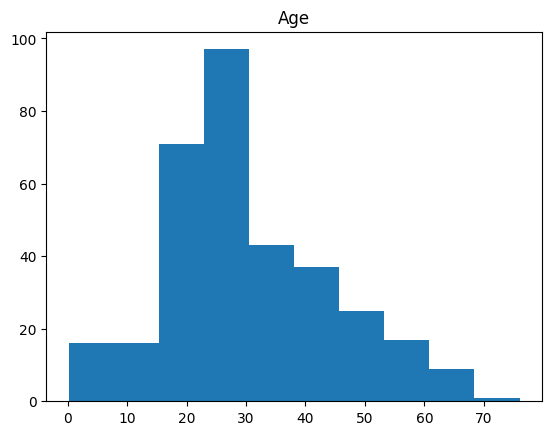

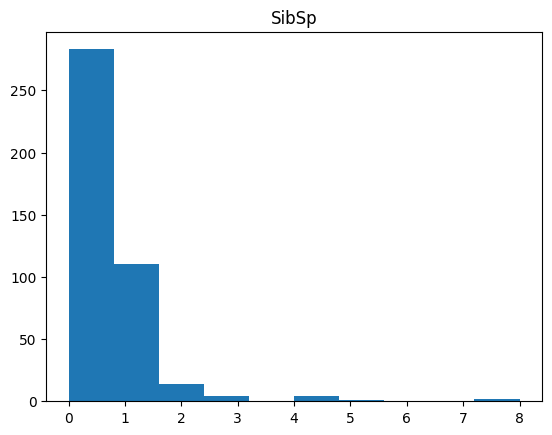

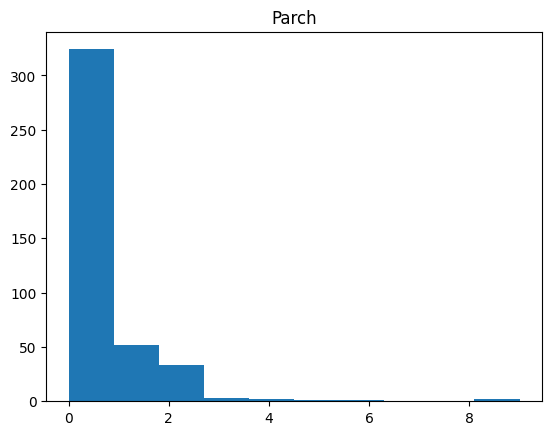

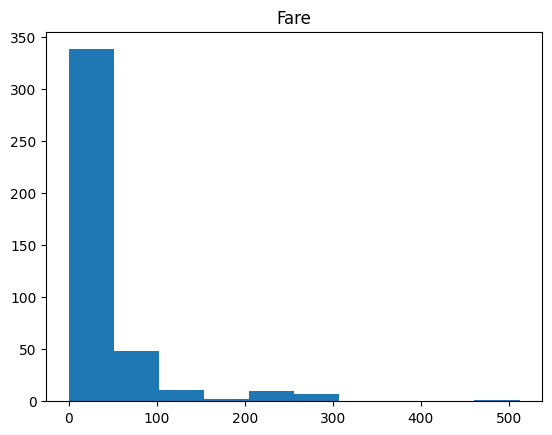

In [238]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

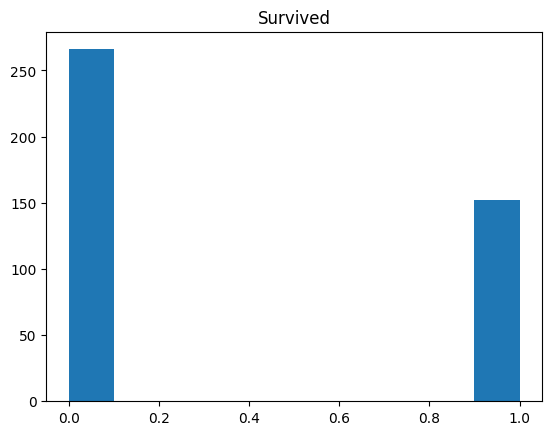

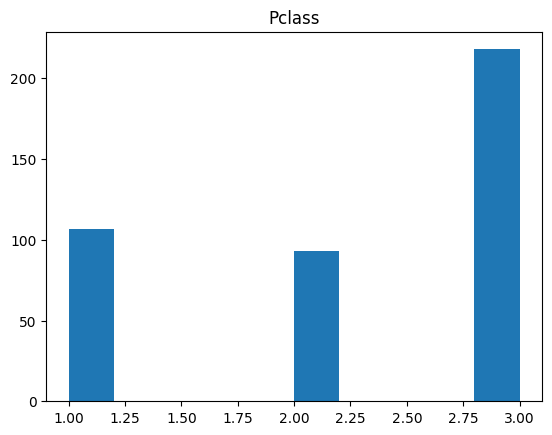

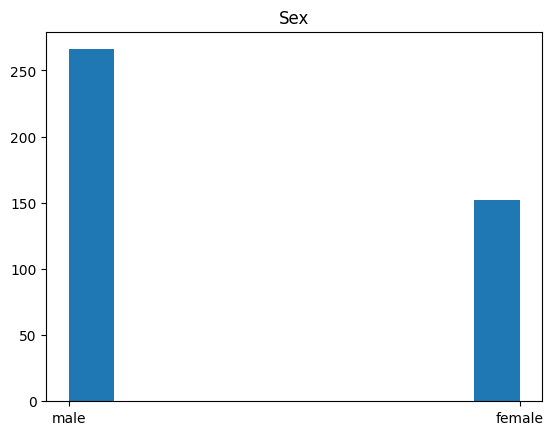

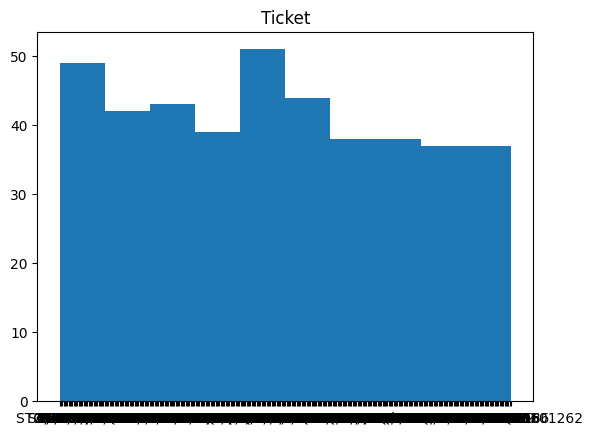

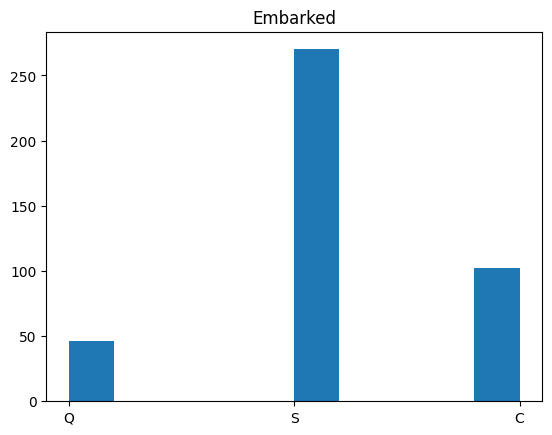

In [240]:
#distributions for all numeric variables 
for j in df_cat.columns:
    plt.hist(df_cat[j])
    plt.title(j)
    plt.show()

# Perhaps we should take the non-normal distributions and consider normalizing them?

            Age     SibSp     Parch      Fare
Age    1.000000 -0.091587 -0.061249  0.337932
SibSp -0.091587  1.000000  0.306895  0.171539
Parch -0.061249  0.306895  1.000000  0.230046
Fare   0.337932  0.171539  0.230046  1.000000


<AxesSubplot:>

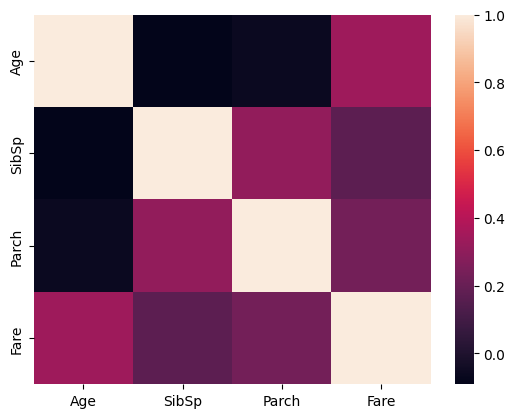

In [241]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [243]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(tested_df , index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.272732,27.527877,0.274436,0.379699
1,30.272362,49.747699,0.598684,0.565789


# Visualizing Quantity

# Histogram
A histogram takes in a series of data and divides the data into a number of bins. It then plots the frequency data points in each bin (i.e. the interval of points). It is useful in understanding the count of data ranges.

When to use: We should use histogram when we need the count of the variable in a plot.

(array([283., 110.,  14.,   4.,   0.,   4.,   1.,   0.,   0.,   2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

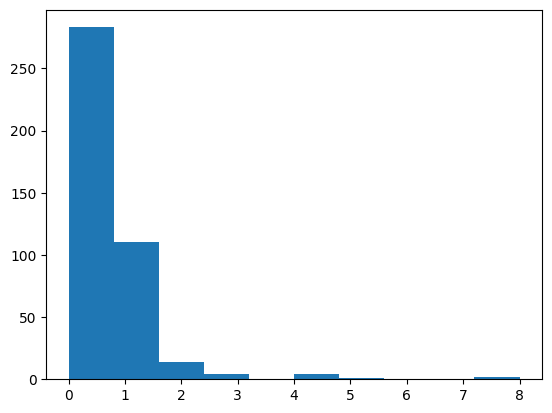

In [248]:
plt.hist(tested_df['SibSp'])

(array([338.,  48.,  11.,   2.,  10.,   7.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

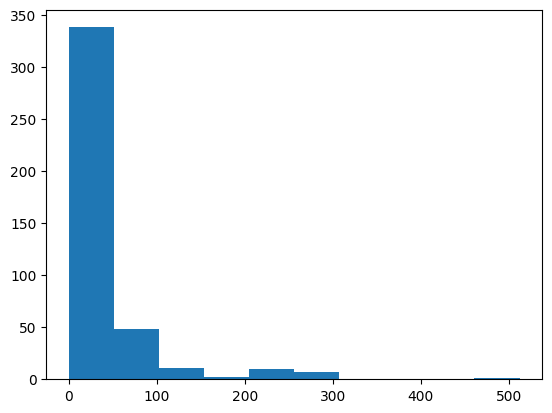

In [249]:
plt.hist(tested_df['Fare'])

# Pie Chart

C:\Users\bakhshi\AppData\Local\Temp\ipykernel_15304\3690096099.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tested_df.groupby(['Sex']).sum().plot(


<AxesSubplot:ylabel='Age'>

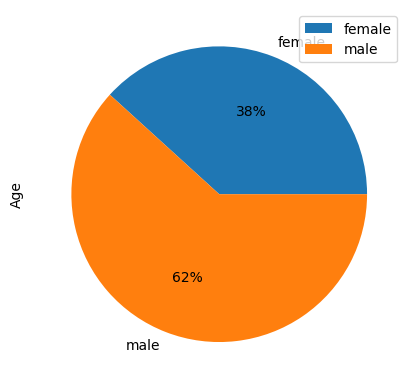

In [263]:
tested_df

tested_df.groupby(['Sex']).sum().plot(
    kind='pie', y='Age', autopct='%1.0f%%')

# plt.pie(tested_df)
# plt.show()

In [268]:
plt.pie(tested_df["Age"], labels = tested_df["Sex"])

ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

In [269]:
plot.show()

NameError: name 'plot' is not defined